In [2]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#  Getting data from the main_dir as i know it already given direct address

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255)
data_dir = '/content/drive/MyDrive/Projects/cattle/horse-or-human/train'
valid_dir = '/content/drive/MyDrive/Projects/cattle/horse-or-human/validation'

In [5]:
train_gen = train_datagen.flow_from_directory(data_dir,
                                             target_size=(300,300),
                                             class_mode='binary'
                                             )

Found 1027 images belonging to 2 classes.


> Model structure
* Input size = 300 x 300 image with 3 channels R,G,B
* Kernal size is 3 x 3
* Filters are 16,32,64,64
* Maxpooling size = 2 x 2
* Activation function is RELU(Linear Retification Unit)
* Last layer output is sigmoid value from 0 to 1

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model._name = "Rebbica"

In [7]:
model.summary()

Model: "Rebbica"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0   

* Optimizer is RMSprop with a learning rate of 0.001
*  Loss function is binary crossentropy

In [8]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(
    loss = 'binary_crossentropy',
    optimizer= opt,
    metrics=['accuracy']
)

In [9]:
valid_datagen = ImageDataGenerator(rescale=1/255)

In [10]:
valid_gen = train_datagen.flow_from_directory(
    valid_dir,
    target_size = (300,300),
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Projects/cattle/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

* Model training for 10 epochs

In [13]:
hist = model.fit_generator(
    train_gen,
    epochs = 10,
    callbacks=[checkpoint],
    validation_data = valid_gen
)

<ipython-input-13-dcf62d882a9f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
33/33 [==============================] - 215s 6s/step - loss: 0.7646 - accuracy: 0.6884 - val_loss: 0.8920 - val_accuracy: 0.7578
Epoch 2/10
33/33 [==============================] - 109s 3s/step - loss: 0.1963 - accuracy: 0.9279 - val_loss: 0.2974 - val_accuracy: 0.9180
Epoch 3/10
33/33 [==============================] - 105s 3s/step - loss: 0.2140 - accuracy: 0.9357 - val_loss: 2.0294 - val_accuracy: 0.8086
Epoch 4/10
33/33 [==============================] - 107s 3s/step - loss: 0.1086 - accuracy: 0.9640 - val_loss: 1.6603 - val_accuracy: 0.8359
Epoch 5/10
33/33 [==============================] - 107s 3s/step - loss: 0.1202 - accuracy: 0.9542 - val_loss: 1.3249 - val_accuracy: 0.8281
Epoch 6/10
33/33 [==============================] - 108s 3s/step - loss: 0.2250 - accuracy: 0.9766 - val_loss: 1.2886 - val_accuracy: 0.7422
Epoch 7/10
33/33 [==============================] - 110s 3s/step - loss: 0.0306 - accuracy: 0.9883 - val_loss: 2.1661 - val_accuracy: 0.8359
Epoch 8/10
33

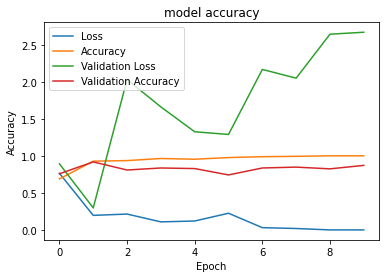

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Loss","Accuracy","Validation Loss","Validation Accuracy"])
plt.show()

In [15]:
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
from PIL import Image
%matplotlib inline

In [17]:
model = load_model('/content/drive/MyDrive/Projects/cattle/weights-improvement-01-0.76.hdf5')

In [18]:
img_path = "/content/drive/MyDrive/Projects/cattle/horse-or-human/horse-or-human/train/horses/Jerseycattle0.jpg"

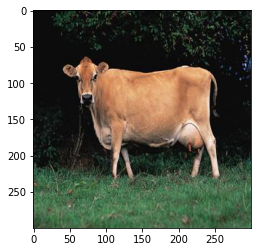

In [19]:
img = image.load_img(img_path, target_size=(300, 300,3))
plt.imshow(img)
plt.show()

In [20]:
image = np.array(Image.open("/content/drive/MyDrive/Projects/cattle/horse-or-human/horse-or-human/train/horses/Jerseycattle0.jpg").resize((300, 300)))
print("shape: ", image.shape)

shape:  (300, 300, 3)


In [21]:
image

array([[[ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [  4,  14,   6],
        [  5,  15,   7],
        [ 11,  21,  13]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [  5,  15,   7],
        [ 11,  21,  13],
        [ 24,  34,  26]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [ 10,  20,  12],
        [  9,  19,  11],
        [ 21,  31,  23]],

       ...,

       [[ 45,  71,  44],
        [ 38,  64,  37],
        [ 36,  60,  34],
        ...,
        [ 80, 130,  93],
        [ 78, 130,  92],
        [ 69, 121,  83]],

       [[ 56,  82,  55],
        [ 54,  78,  52],
        [ 50,  74,  48],
        ...,
        [ 86, 136,  99],
        [ 82, 132,  95],
        [ 69, 121,  83]],

       [[ 74,  98,  72],
        [ 72,  96,  70],
        [ 66,  89,  63],
        ...,
        [ 91, 138, 102],
        [ 85, 132,  96],
        [ 69, 119,  82]]

In [22]:
pr_mask = model.predict(image).round()

ValueError: ignored